# Определение возраста покупателей по их фотографиям

Информация о возрасте покупателей относится к персональным данным, к ней нет открытого доступа и поэтому собрать сведения о возрасте не так просто. Однако знание возраста покупателей помогает компаниям розничной торговли сегментировать аудиторию, выявлять потребности и предпочтения покупателей разных возрастных категорий, определять целевую возрастную аудиторию и предлагать ей товары, соответствующие её потребностям и интересам. Кроме того, знание возраста покупателей помогает компаниям соблюдать законы, которые регулируют продажу определённых товаров определённым возрастным группам, таких, как например алкоголь и табачная продукция. А также позволяет проверять кассиров на добросовестность при продаже такой продукции.

Возраст покупателя можно определить по его фотографии. Для получения такой фотографии в прикассовой зоне размещают системы фотофиксации &mdash; камеры фото- и видео-наблюдения. В такие устройства могут быть интегрированы системы компьютерного зрения. Именно они решают задачу определения возраста покупателя по фотографии. Для анализа и обработки полученных фотографий системы компьютерного зрения используют алгоритмы машинного обучения.

В нашем распоряжении находится набор фотографий людей. Для каждой фотографии известен возраст изображённого на ней человека. Данные взяты с сайта [ChaLearn Looking at People](https://chalearnlap.cvc.uab.cat/dataset/26/description/).

Для того чтобы определить возраст покупателей по их фотографиям, нужно построить модель, которая сможет проанализировать полученную фотографию покупателя и наиболее точным образом определит его возраст.

**Цель проекта:** построить модель, определяющую возраст человека по его фотографии.

**Задачи проекта:**
- выполнить предобработку данных;
- провести описательный анализ данных;
- разбить данные на тренировочную и валидационную выборки;
- выбрать алгоритмы и построить модели;
- выбрать метрики качества моделей и оценить их значения.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-предварительные-настройки" data-toc-modified-id="Импорт-библиотек-и-предварительные-настройки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и предварительные настройки</a></span></li><li><span><a href="#Чтение-файла-и-загрузка-данных" data-toc-modified-id="Чтение-файла-и-загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файла и загрузка данных</a></span></li><li><span><a href="#Общая-характеристика-набора-данных" data-toc-modified-id="Общая-характеристика-набора-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общая характеристика набора данных</a></span></li></ul></li><li><span><a href="#Описательный-анализ-данных" data-toc-modified-id="Описательный-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описательный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Возраст" data-toc-modified-id="Возраст-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Возраст</a></span></li><li><span><a href="#Фотографии" data-toc-modified-id="Фотографии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Фотографии</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Результат-обучения-модели" data-toc-modified-id="Результат-обучения-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Результат обучения модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

### Импорт библиотек и предварительные настройки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

RANDOM_SEED = 1

### Чтение файла и загрузка данных

Данные с описанием изображений хранятся в одном файле.
<br> Файл данных `labels.csv` имеет формат `CSV`.

In [2]:
pth = '/datasets/faces/labels.csv'

if os.path.exists(pth):
    data = pd.read_csv(pth)
else:
    print('Something is wrong')

Изображения хранятся в папке `/final_files`.

In [3]:
fold_pth = '/datasets/faces/final_files'

if os.path.exists(fold_pth):
    path = fold_pth
else:
    print('Something is wrong')

Убедимся, что данные подгрузились верно, без ошибок.

Для этого выведем первые 5 строк и последние 5 строк набора данных.

In [4]:
data.head()

file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17

In [5]:
data.tail()

file_name  real_age
7586  007608.jpg        14
7587  007609.jpg        37
7588  007610.jpg        28
7589  007611.jpg        20
7590  007612.jpg        47

### Общая характеристика набора данных

Размер набора данных:

In [6]:
data.shape

(7591, 2)

Количество элементов данных:

In [7]:
data.size

15182

Типы данных набора данных:

In [8]:
data.dtypes

file_name    object
real_age      int64
dtype: object

Пропущенные значения в данных:

In [9]:
data.isna().sum()

file_name    0
real_age     0
dtype: int64

**Промежуточный вывод**

- Набор данных содержит 2 уникальных признака и 7591 запись.
- Всего: 15182 элемента данных.
- Набор данных содержит данные следующего типа:
    - целочисленный &mdash; 1 признак,
    - смешанный &mdash; 1 признак.
- Все признаки содержат значения (не являются пустыми).
- Все признаки не содержат пропущенные значения.

## Описательный анализ данных

Предварительно зададим функцию, рассчитывающую описательные статистики.

In [10]:
def descriptive_statistics(values, label):
    '''
    Описательная статистика переменной, измеряемой в количественной шкале.
    
    Принимает значения признака и название признака.
    Возвращает DataFrame с набором статистик.
       
    '''
    
    df = pd.DataFrame([
        values.count(),
        len(values.unique()),
        values.min(),
        values.median() - 1.5 * (values.quantile(q=.75) - 
                                 values.quantile(q=.25)),
        values.quantile(q=.25).round(2),
        (values.mode()).to_list(), 
        values.median().round(2),
        values.mean().round(2),
        values.quantile(q=.75).round(2),
        values.median() + 1.5 * (values.quantile(q=.75) - 
                                 values.quantile(q=.25)),
        values.max(),
        values.max() - values.min(),
        values.quantile(q=.75) - values.quantile(q=.25)
    ], 
        index=['кол-во значений', 'кол-во уникальных', 'мин.', 
               '-1.5IQR', '25 %', 'мода', 'медиана', 
               'среднее ариф.', '75 %', '+1.5IQR', 'макс.', 
               'размах', 'межквартильный размах'], 
        columns=[label])
    
    return df

### Возраст

In [11]:
descriptive_statistics(data['real_age'], 'Возраст, лет')

Возраст, лет
кол-во значений               7591
кол-во уникальных               97
мин.                             1
-1.5IQR                       -2.5
25 %                          20.0
мода                          [30]
медиана                       29.0
среднее ариф.                 31.2
75 %                          41.0
+1.5IQR                       60.5
макс.                          100
размах                          99
межквартильный размах         21.0

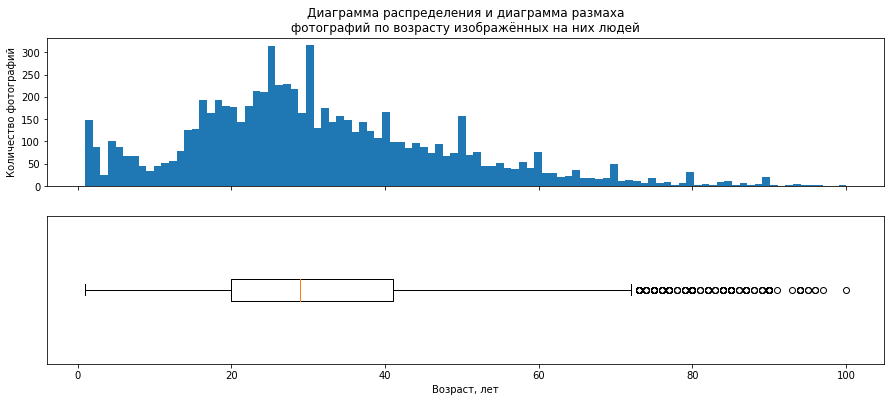

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))
ax1.set_title('Диаграмма распределения и диаграмма размаха' +
              '\nфотографий по возрасту изображённых на них людей')
ax1.hist(data['real_age'], bins=100)
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('Количество фотографий')
ax2.boxplot(data['real_age'], vert=False)
ax2.tick_params(left=False, labelleft=False)
ax2.set_xlabel('Возраст, лет')
plt.show()

- Значения определены для всех записей.
- Для 7591 записи встречается 97 различных уникальных значений.
- Минимальное значение &mdash; 1 год, максимальное значение &mdash; 100 лет.
- Мода &mdash; 30, медиана &mdash; 29 лет, среднее арифметическое &mdash; 31 год. 
- Распределение несимметричное, смещено влево. Имеет четыре слабо выраженных пика. Наблюдается повышенное количество "круглых" значений возраста (30, 40, 50, ... лет).
- Половина всех значений лежит в пределах от 20 лет до 41 года.
- Практически все значения менее 61 года.

### Фотографии

- Примеры фотографий

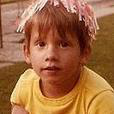

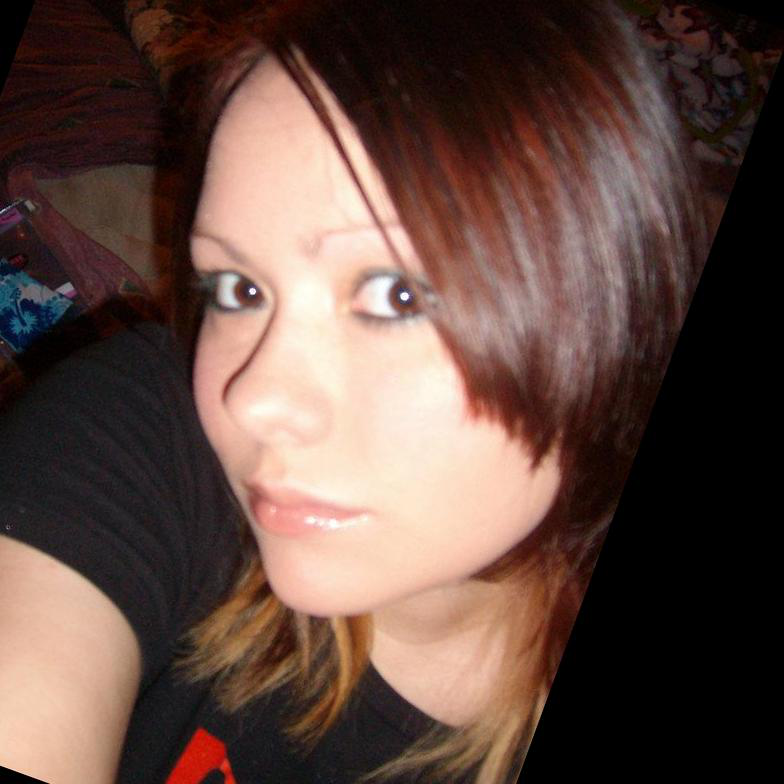

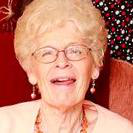

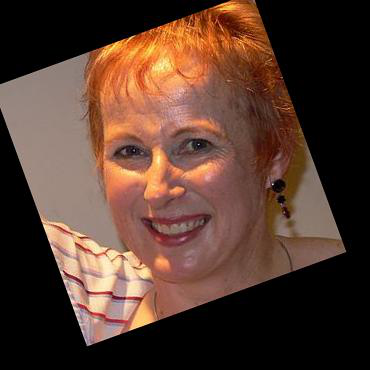

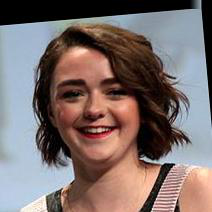

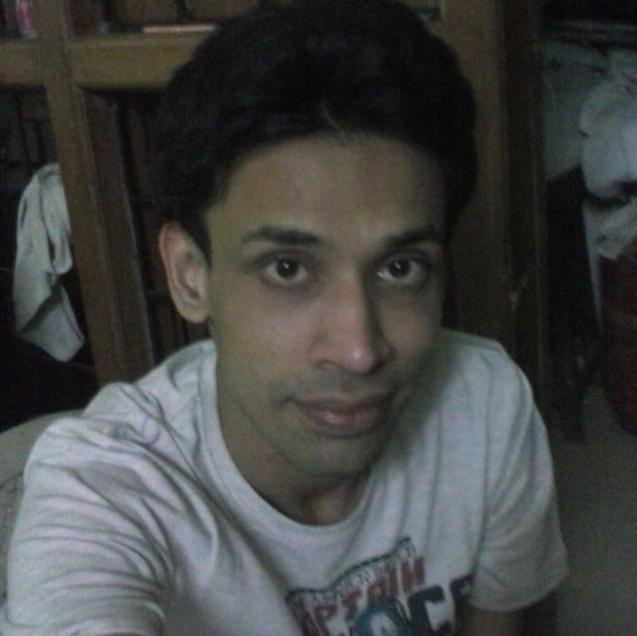

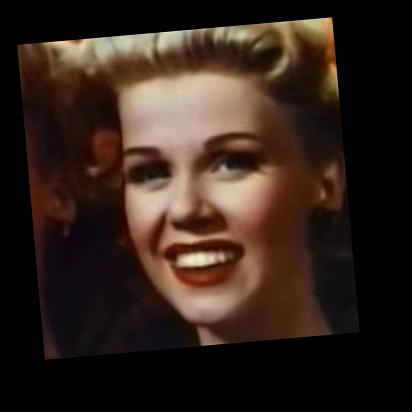

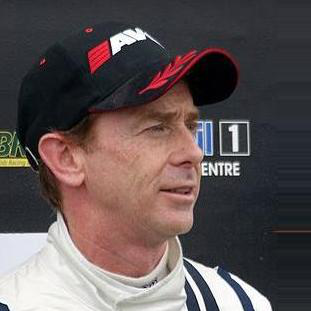

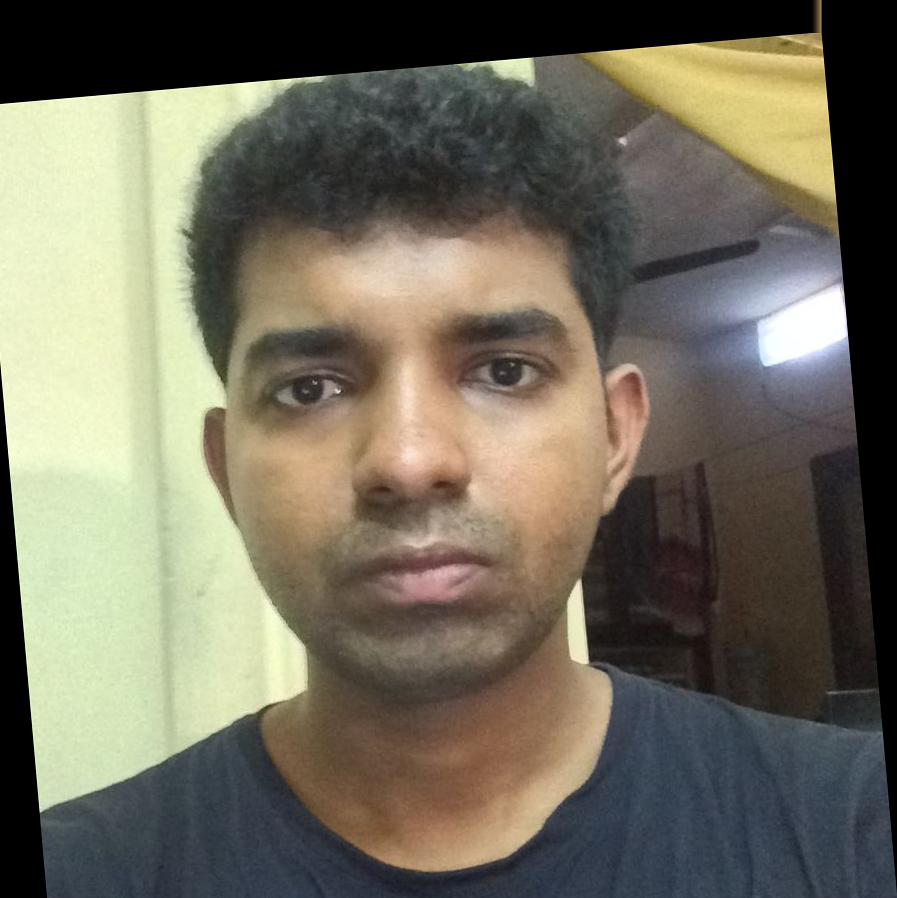

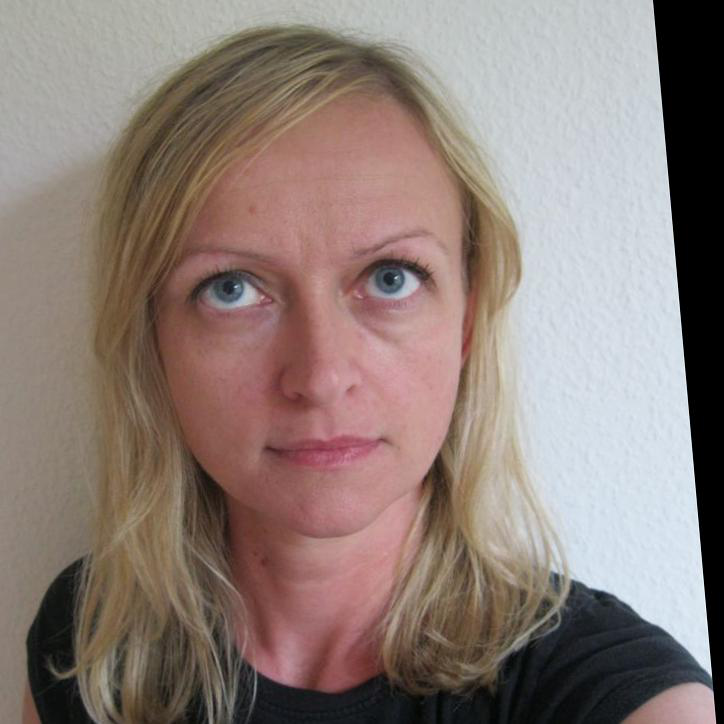

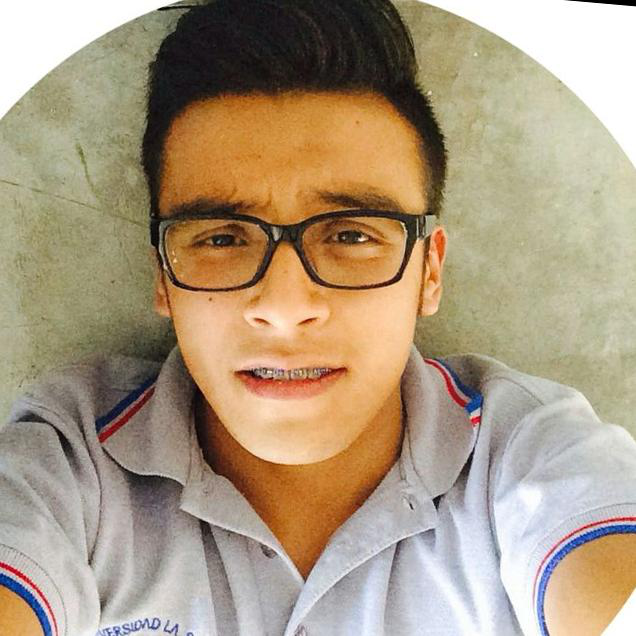

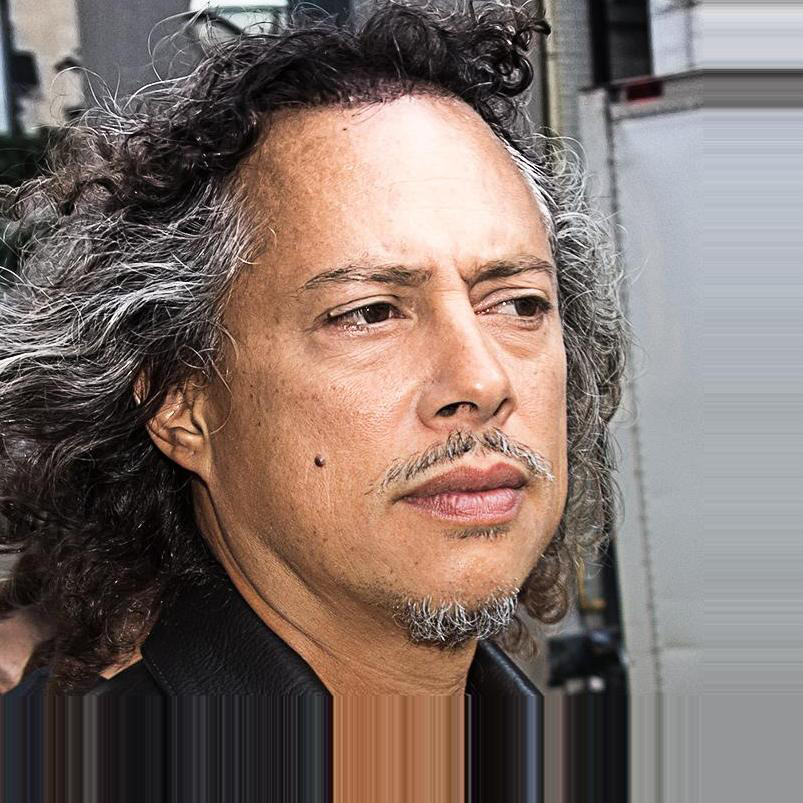

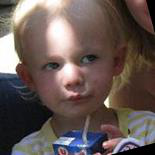

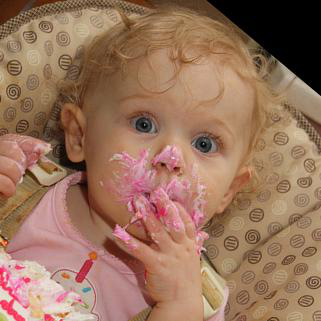

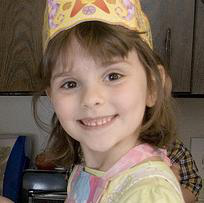

In [13]:
for i in range(15):
    display(Image.open(path + '/' + data.loc[i, 'file_name'].format()))

**Извлечение вложенных сведений**

- Размеры фотографий

In [14]:
df = pd.DataFrame([], columns=['length', 'width', 'channels'])

for i in range(len(data)):
    image = Image.open(path + '/' + data.loc[i, 'file_name'].format())
    df_i = pd.DataFrame(np.array(image).shape, 
                        index=['length', 'width', 'channels'], 
                        columns=[i]).T
    df = pd.concat([df, df_i])

In [15]:
df.sort_values(by='length')

length width channels
3412     47    47        3
628      53    52        3
6970     55    54        3
5362     56    57        3
1843     56    56        3
...     ...   ...      ...
5382   3666  3666        3
3557   3822  3822        3
2358   3829  3829        3
2028   3836  3836        3
1173   4466  4466        3

[7591 rows x 3 columns]

- Количество квадратных фотографий

In [16]:
sum(df['length'] == df['width']) + \
sum(df['length'] + 1 == df['width']) + \
sum(df['length'] - 1 == df['width']) 

7352

In [17]:
descriptive_statistics(df['length'].astype('int'), 'Длина, пиксели').join(
    descriptive_statistics(df['width'].astype('int'), 'Ширина, пиксели')).join(
    descriptive_statistics(df['channels'].astype('int'), 'Каналы'))

Длина, пиксели Ширина, пиксели Каналы
кол-во значений                 7591            7591   7591
кол-во уникальных               1204            1195      1
мин.                              47              47      3
-1.5IQR                       -234.0          -233.0    3.0
25 %                           220.0           220.0    3.0
мода                           [165]           [165]    [3]
медиана                        384.0           385.0    3.0
среднее ариф.                 464.09          464.73    3.0
75 %                           632.0           632.0    3.0
+1.5IQR                       1002.0          1003.0    3.0
макс.                           4466            4466      3
размах                          4419            4419      0
межквартильный размах          412.0           412.0    0.0

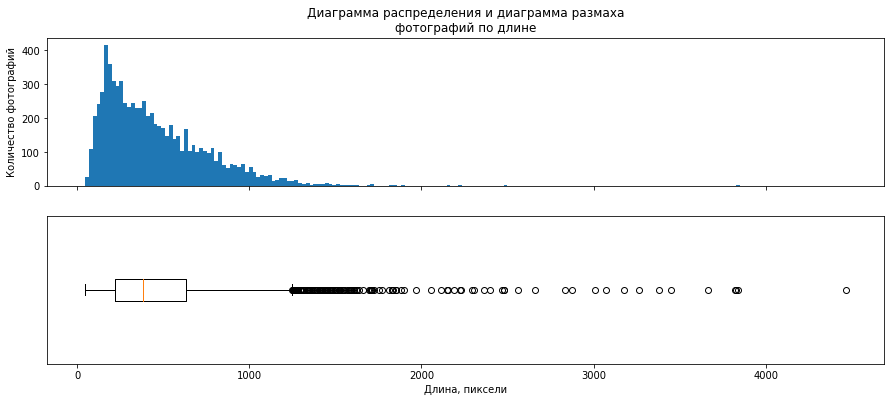

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))
ax1.set_title('Диаграмма распределения и диаграмма размаха' +
              '\nфотографий по длине')
ax1.hist(df['length'], bins=200)
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('Количество фотографий')
ax2.boxplot(df['length'], vert=False)
ax2.tick_params(left=False, labelleft=False)
ax2.set_xlabel('Длина, пиксели')
plt.show()

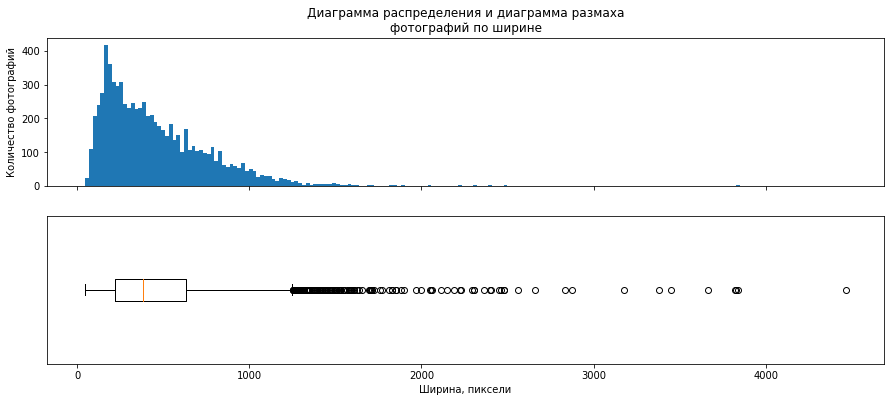

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))
ax1.set_title('Диаграмма распределения и диаграмма размаха' +
              '\nфотографий по ширине')
ax1.hist(df['width'], bins=200)
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('Количество фотографий')
ax2.boxplot(df['width'], vert=False)
ax2.tick_params(left=False, labelleft=False)
ax2.set_xlabel('Ширина, пиксели')
plt.show()

- Наиболее распространённые размеры фотографий

In [20]:
df['length'].value_counts().head(10).sort_index()

142    31
165    52
166    49
177    30
184    31
247    34
331    36
517    37
577    29
640    34
Name: length, dtype: int64

- Фотографии имеют сквозную нумерацию. В процессе формирования набора данных было извлечено несколько фотографий: для 7591 фотографии существуют номера, превышающие значение 7591 (например, 7612).
- Все фотографии цветные (количество каналов равно 3).
- Фотографии имеют разный размер.
- 7352 фотографии из 7591 являются квадратными (либо длина и ширина отличаются на 1 пиксель) &mdash; это 97 % всех фотографий.
- Для 7591 фотографии встречается 1204 различных уникальных значений длины и 1195 различных уникальных значений ширины.
- Минимальные значения размеров фотографий &mdash; 47&times;47, максимальные значения размеров фотографий &mdash; 4466&times;4466.
- Мода размеров &mdash; 165&times;165, медиана размеров &mdash; 384&times;385.
- Распределения значений длины и ширины унимодальные, несимметричные, смещены влево, с длинными "хвостами" справа.
- Размеры половины всех фотографий изменяются в пределах от 220&times;220 до 632&times;632.
- Размеры почти всех фотографий не превышают 1002&times;1003.
- Топ-10 самых распространённых размеров находятся в пределах от 142&times;142 до 640&times;640.

**Промежуточный вывод**

- Поскольку объём данных большой, для построения модели необходимо использовать алгоритмы нейронных сетей.
- Для загрузки данных из папки необходимо использовать загрузчик.
- Изображения необходимо нормализовать &mdash; привести значения яркости каждого канала к отрезку \[0; 1\].
- Изображения нужно привести к одинаковому размеру, квадратному формату; длина и ширина должны лежать в пределах 220&ndash;632 пикселей.

## Построение модели

### Обучение модели

Поскольку признак ```real_age``` &mdash; количественный (непрерывный), следовательно, необходимо решить задачу регрессии.

В качестве алгоритма, позволяющего определить возраст человека по его фотографии, необходимо выбрать нейронную сеть. Они имеют преимущество перед алгоритмами других типов, поскольку справляются с большим числом признаков (в нашем случае &mdash;  с
большим числом пискелей) и могут учитывать их порядок (поскольку соседние пиксели связаны друг с другом).

Оценку качества обученной модели будем проводить, рассчитывая значение среднего абсолютного отклонения (MAE). Обученная модель будет считаться выполняющей качественный прогноз, если значение MAE будет составлять не более 8 лет.

Для того чтобы получить максимально высокое качество предсказания, нужно сформировать архитектуру нейронной сети и перебрать разные значения гиперпараметров.

Наилучшими гиперпараметрами для нейронной сети признаем те, при которых получится минимальное значение MAE обученной модели, оценённой на валидационной выборке. Предварительно разделим данные на тренировочную и валидационную выборки в отношении 3 : 1.

Обучение модели нейронной сети и подбор её параметров производились в отдельном GPU-тренажёре. Поэтому ниже представлены функции, позволяющие подгрузить тренировочную и валидационную выборки, сформировать модель нейронной сети и затем обучить её.

```python
def load_train(path):
    '''
    Функция загрузки и предварительной обработки данных 
    тренировочной выборки с помощью загрузчика ImageDataGenerator.
    
    Принимает путь к каталогу данных тренировочной выборки.
    Возвращает массив предварительно обработанных данных 
    тренировочной выборки.
    
    '''

    train_datagen = ImageDataGenerator(validation_split=0.25,
                                       rescale=1/255.,
                                       rotation_range=45)
    
    train_datagen_flow = train_datagen.flow_from_dataframe(
        pd.read_csv(path + '/labels.csv'),
        path + '/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(256, 256),
        batch_size=64,
        subset='training',
        class_mode='raw',
        seed=RANDOM_SEED)

    return train_datagen_flow
```

```python
def load_test(path):
    '''
    Функция загрузки и предварительной обработки данных 
    валидационной выборки с помощью загрузчика ImageDataGenerator.
    
    Принимает путь к каталогу данных валидационной выборки.
    Возвращает массив предварительно обработанных данных 
    валидационной выборки.
    
    '''

    test_datagen = ImageDataGenerator(validation_split=0.25,
                                      rescale=1/255.)

    test_datagen_flow = test_datagen.flow_from_dataframe(
        pd.read_csv(path + '/labels.csv'),
        path + '/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(256, 256),
        batch_size=64,
        subset='validation',
        class_mode='raw',
        seed=RANDOM_SEED)

    return test_datagen_flow
```

```python
def create_model(input_shape):
    '''
    Функция для создания архитектуры свёрточной нейронной сети
    на основе остатка нейронной сети ResNet50.
    
    Принимает размер входного изображения.
    Возвращает созданную модель.
    
    '''

    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu', kernel_initializer='he_normal'))

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, 
                  loss='mse',
                  metrics=['mae'])

    return model
```

```python
def train_model(model, train_data, test_data, batch_size=None, epochs=50,
                steps_per_epoch=None, validation_steps=None):
    '''
    Функция для обучения модели.
    
    Принимает модель (архитектуру нейронной сети),
    массивы тренировочных и валидационных данных,
    размер батча, количество эпох, количество шагов за эпоху,
    количество валидационных шагов.
    Возвращает обученную модель.
    
    '''

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model
```

### Результат обучения модели

Результат обучения модели нейронной сети в GPU-тренажёре и последующей валидации приведён ниже.

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.

Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

<class 'tensorflow.python.keras.engine.sequential.Sequential'>

Train for 89 steps, validate for 30 steps
Epoch 1/50
89/89 - 140s - loss: 328.9280 - mae: 13.3534 - val_loss: 1020.1837 - val_mae: 27.3262
Epoch 2/50
89/89 - 111s - loss: 105.5585 - mae: 7.7810 - val_loss: 1020.9325 - val_mae: 27.3384
Epoch 3/50
89/89 - 111s - loss: 78.3075 - mae: 6.6806 - val_loss: 965.8181 - val_mae: 26.3989
Epoch 4/50
89/89 - 112s - loss: 63.9115 - mae: 6.0858 - val_loss: 785.7856 - val_mae: 23.0583
Epoch 5/50
89/89 - 111s - loss: 50.1345 - mae: 5.4382 - val_loss: 684.8841 - val_mae: 21.0371
Epoch 6/50
89/89 - 120s - loss: 43.1717 - mae: 5.0255 - val_loss: 358.2819 - val_mae: 13.9674
Epoch 7/50
89/89 - 115s - loss: 36.1324 - mae: 4.6076 - val_loss: 205.5567 - val_mae: 10.5592
Epoch 8/50
89/89 - 121s - loss: 32.8487 - mae: 4.3471 - val_loss: 161.8040 - val_mae: 9.4022
Epoch 9/50
89/89 - 114s - loss: 30.3370 - mae: 4.2152 - val_loss: 90.2561 - val_mae: 7.1404
Epoch 10/50
89/89 - 116s - loss: 27.1724 - mae: 3.9550 - val_loss: 84.7218 - val_mae: 6.9531
Epoch 11/50
89/89 - 113s - loss: 23.5523 - mae: 3.7280 - val_loss: 72.5305 - val_mae: 6.3767
Epoch 12/50
89/89 - 112s - loss: 20.5397 - mae: 3.4905 - val_loss: 65.4617 - val_mae: 6.0253
Epoch 13/50
89/89 - 114s - loss: 18.8801 - mae: 3.3368 - val_loss: 69.6698 - val_mae: 6.1905
Epoch 14/50
89/89 - 113s - loss: 17.1416 - mae: 3.2058 - val_loss: 70.3066 - val_mae: 6.1744
Epoch 15/50
89/89 - 111s - loss: 16.0678 - mae: 3.0901 - val_loss: 66.3302 - val_mae: 6.0238
Epoch 16/50
89/89 - 115s - loss: 16.0750 - mae: 3.0664 - val_loss: 69.9277 - val_mae: 6.2725
Epoch 17/50
89/89 - 126s - loss: 15.6708 - mae: 2.9980 - val_loss: 69.8595 - val_mae: 6.0974
Epoch 18/50
89/89 - 116s - loss: 13.5442 - mae: 2.8398 - val_loss: 70.6848 - val_mae: 6.3703
Epoch 19/50
89/89 - 120s - loss: 14.4450 - mae: 2.8492 - val_loss: 77.2341 - val_mae: 6.7552
Epoch 20/50
89/89 - 120s - loss: 12.8667 - mae: 2.7539 - val_loss: 63.8064 - val_mae: 5.9014
Epoch 21/50
89/89 - 115s - loss: 12.2216 - mae: 2.6699 - val_loss: 65.7887 - val_mae: 6.1002
Epoch 22/50
89/89 - 118s - loss: 11.1268 - mae: 2.5336 - val_loss: 66.6701 - val_mae: 6.1723
Epoch 23/50
89/89 - 120s - loss: 10.0752 - mae: 2.4243 - val_loss: 72.2095 - val_mae: 6.1799
Epoch 24/50
89/89 - 122s - loss: 8.9655 - mae: 2.2896 - val_loss: 63.6950 - val_mae: 5.9948
Epoch 25/50
89/89 - 120s - loss: 9.2164 - mae: 2.3179 - val_loss: 69.2671 - val_mae: 6.2688
Epoch 26/50
89/89 - 119s - loss: 8.7037 - mae: 2.2399 - val_loss: 73.1836 - val_mae: 6.2273
Epoch 27/50
89/89 - 115s - loss: 8.1465 - mae: 2.1759 - val_loss: 65.8533 - val_mae: 5.9357
Epoch 28/50
89/89 - 113s - loss: 7.7939 - mae: 2.1086 - val_loss: 62.7987 - val_mae: 5.9073
Epoch 29/50
89/89 - 114s - loss: 7.0744 - mae: 2.0319 - val_loss: 64.3412 - val_mae: 5.9498
Epoch 30/50
89/89 - 117s - loss: 7.1597 - mae: 2.0348 - val_loss: 67.5623 - val_mae: 6.0443
Epoch 31/50
89/89 - 126s - loss: 7.4333 - mae: 2.0587 - val_loss: 60.7065 - val_mae: 5.8151
Epoch 32/50
89/89 - 123s - loss: 7.0807 - mae: 1.9952 - val_loss: 61.4404 - val_mae: 5.8495
Epoch 33/50
89/89 - 124s - loss: 6.6550 - mae: 1.9733 - val_loss: 71.2601 - val_mae: 6.1744
Epoch 34/50
89/89 - 125s - loss: 6.9396 - mae: 1.9890 - val_loss: 61.6903 - val_mae: 5.8718
Epoch 35/50
89/89 - 124s - loss: 6.3639 - mae: 1.9219 - val_loss: 63.3953 - val_mae: 5.8648
Epoch 36/50
89/89 - 125s - loss: 6.3848 - mae: 1.9204 - val_loss: 62.2525 - val_mae: 5.8676
Epoch 37/50
89/89 - 125s - loss: 6.1341 - mae: 1.8800 - val_loss: 69.7907 - val_mae: 6.1425
Epoch 38/50
89/89 - 126s - loss: 6.1518 - mae: 1.8598 - val_loss: 64.9688 - val_mae: 5.9842
Epoch 39/50
89/89 - 124s - loss: 5.8861 - mae: 1.8401 - val_loss: 63.7073 - val_mae: 6.0016
Epoch 40/50
89/89 - 125s - loss: 5.8513 - mae: 1.8342 - val_loss: 63.0910 - val_mae: 5.8822
Epoch 41/50
89/89 - 127s - loss: 5.9209 - mae: 1.8501 - val_loss: 62.4617 - val_mae: 5.9571
Epoch 42/50
89/89 - 117s - loss: 5.9448 - mae: 1.8378 - val_loss: 62.9336 - val_mae: 5.8814
Epoch 43/50
89/89 - 113s - loss: 5.3904 - mae: 1.7558 - val_loss: 62.7327 - val_mae: 5.9020
Epoch 44/50
89/89 - 112s - loss: 5.7905 - mae: 1.8179 - val_loss: 68.2198 - val_mae: 6.0437
Epoch 45/50
89/89 - 112s - loss: 5.5795 - mae: 1.7802 - val_loss: 60.2461 - val_mae: 5.7179
Epoch 46/50
89/89 - 111s - loss: 5.7370 - mae: 1.8056 - val_loss: 57.4336 - val_mae: 5.6414
Epoch 47/50
89/89 - 111s - loss: 5.6102 - mae: 1.7960 - val_loss: 61.4836 - val_mae: 5.9169
Epoch 48/50
89/89 - 114s - loss: 5.3291 - mae: 1.7529 - val_loss: 59.6648 - val_mae: 5.7440
Epoch 49/50
89/89 - 116s - loss: 5.3587 - mae: 1.7544 - val_loss: 59.2907 - val_mae: 5.6626
Epoch 50/50
89/89 - 117s - loss: 5.3666 - mae: 1.7400 - val_loss: 61.6307 - val_mae: 5.8022

30/30 - 12s - loss: 61.6307 - mae: 5.8022
Test MAE: 5.8022
```

**Анализ процесса обучения модели**

- В результате обучения и валидации модели наблюдается отсутствие переобучения.
- Значение MAE на тренировочной выборке хоть и медленно, но всё же снижается.
- Значение MAE на валидационной выборке, конечно, периодически изменяется в пределах $\pm$ 0,2 года, но если отслеживать среднее по 4&ndash;5 ближайшим значениям, то можно заметить, что снижение метрики тоже происходит, хоть и медленно.

## Общий вывод

1. Для цели предсказания возраста человека по его фотографии были построены нейронные сети.
2. Было обучено несколько моделей нейронных сетей с различными гиперпараметрами.
3. Наилучшие показатели качества демонстрирует модель нейронной сети, состоящая из остатка предобученной на ImageNet нейронной сети ResNet50 со слоем GlobalAveragePooling2D для уменьшения размерности и завершающим полносвязным слоем с одним нейроном, функцией активации ReLU и методом инициализации начальных весов he_normal. Алгоритмом оптимизации является Adam со скоростью обучения 0,0001, функцией потерь является MSE.
4. Для извлечения данных из папки и передачи и на обучение используется загрузчик ImageDataGenerator с размером батча 64. К изображениям применяется метод аугментации &mdash; поворот на 45 градусов.
5. Все изображения приведены к формату 256&times;256, к ним применён метод нормализации.
6. Обучение завершилось за 50 эпох. Наименьшее значение MAE на валидационной выборке составило 5,8 лет.